<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"

data = pd.read_csv(data_url)

In [ ]:
data.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rj_data = data[(data.state == 'RJ') & (data.city=="TOTAL")]
rj_data['date'] = pd.to_datetime(rj_data.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rj_data.set_index('date', inplace=True)



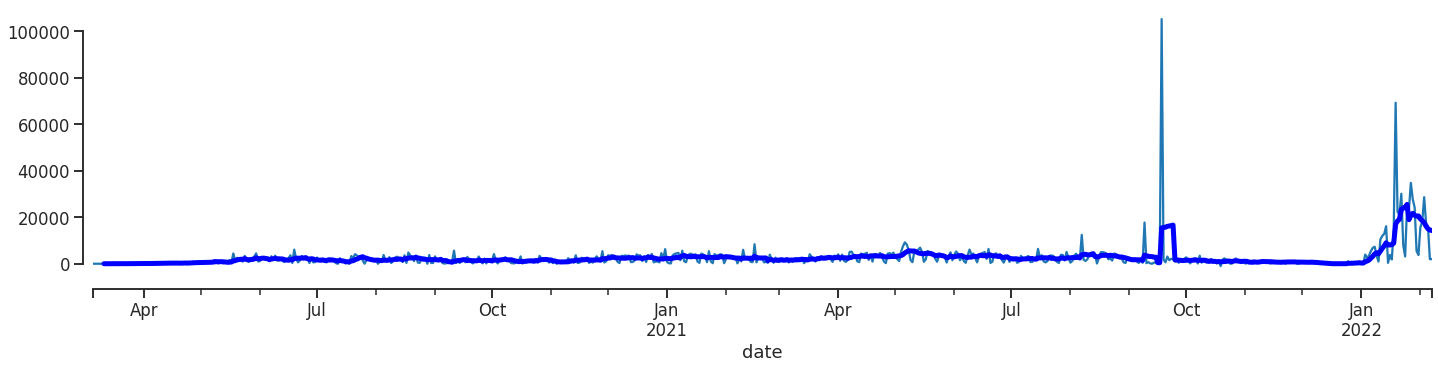

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_series(series):
    sns.set_context("talk")
    sns.set_style("ticks")

    fig, ax = plt.subplots(1, 1, figsize=(24, 5))
    ax = series.plot(ax = ax)
    ax.yaxis.grid(True)
    sns.despine(offset=10, trim=True)
    return ax

ax = plot_series(rj_data.newCases)
rj_data.newCases.rolling(7).mean().plot(ax=ax, c='b', lw=5)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x7f3eea558810>), ('right', <matplotlib.spines.Spine object at 0x7f3eea558c10>), ('bottom', <matplotlib.spines.Spine object at 0x7f3eea58bd90>), ('top', <matplotlib.spines.Spine object at 0x7f3eea58bb50>)])


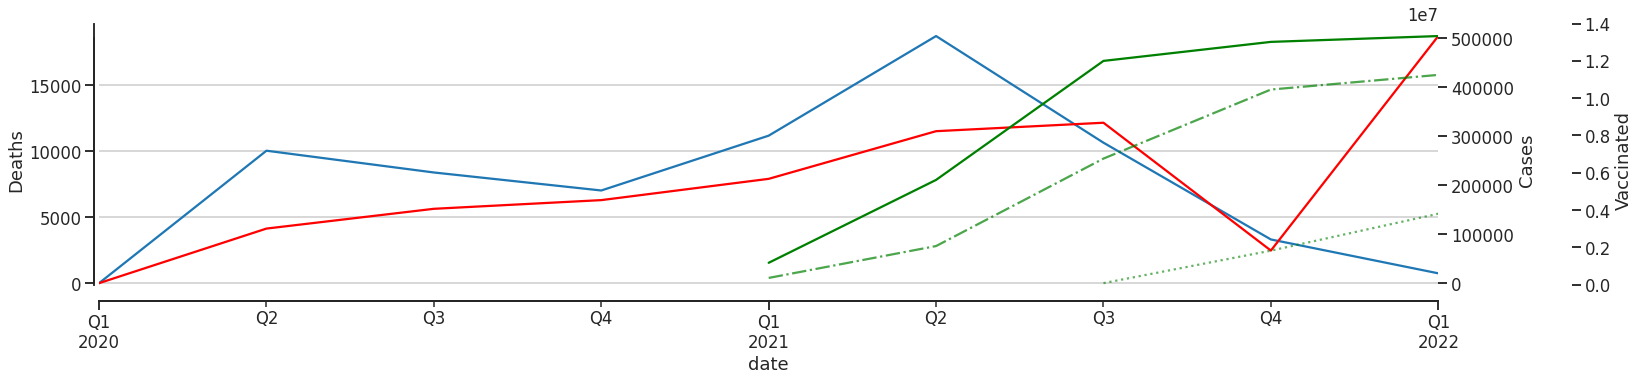

In [ ]:
ax = plot_series(rj_data.newDeaths.resample("1Q").sum())
ax.set_ylabel("Deaths")
ax2 = ax.twinx()
rj_data.newCases.resample("1Q").sum().plot(ax=ax2, c="r")
ax2.set_ylabel("Cases")

ax3=ax.twinx()
print(ax3.spines)
ax3.spines["right"].set_position(("axes", 1.1))
ax3.set_ylabel("Vaccinated")
rj_data.resample("1Q").max().vaccinated.plot(ax=ax3, c='g')
rj_data.resample("1Q").max().vaccinated_second.plot(ax=ax3, c='g', alpha=.7, ls="-.")
rj_data.resample("1Q").max().vaccinated_third.plot(ax=ax3, c='g', alpha=.6, ls=":")


sns.despine(trim=True, offset=5)




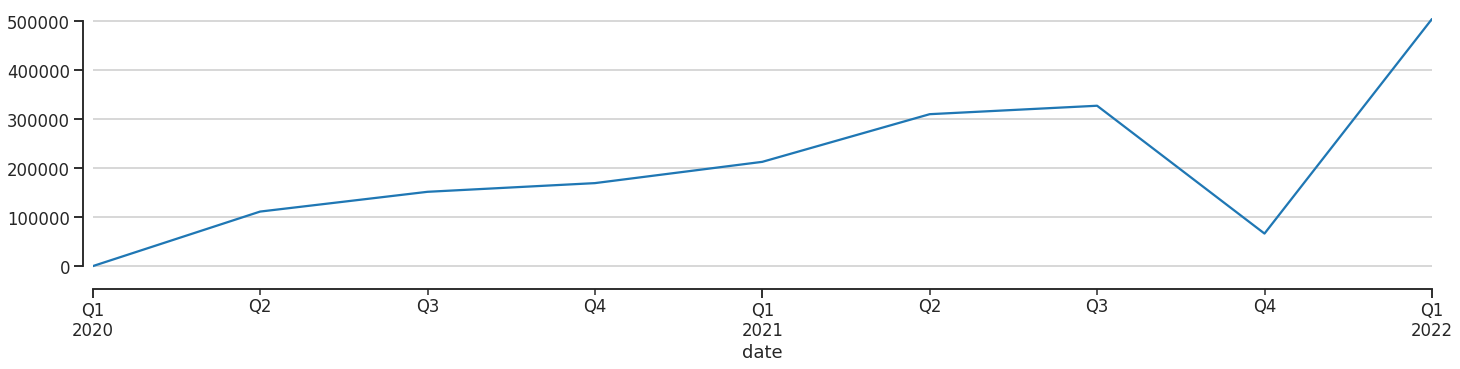

In [ ]:

ax = plot_series(rj_data.newCases.resample("1Q").sum())


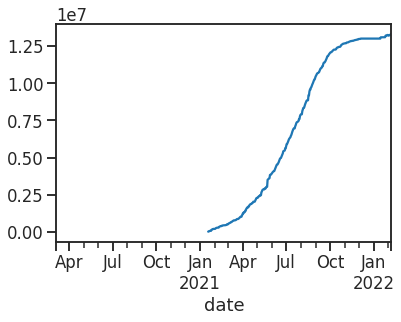

In [ ]:
rj_data.vaccinated.plot()